# Lets talk about long exposure

Long exposure is a _gorgeous technique_, but in order to capture these types of shots, you need to take a methodical approach: mounting your camera on a tripod, applying various filters, computing exposure values, etc. Not to mention, you need to be a skilled photographer!

When applying this technique, water becomes silky smooth, stars in a night sky leave light trails as the earth rotates, and car headlights/taillights illuminate highways in a single band of continuous motion.

I know a little about processing images — but let’s face it, _I’m a terrible photographer_.

Luckily, there is a way to simulate long exposures by applying image/frame averaging. 

Example input                   | Example output
:------------------------------:|:---------------------------------:
![](./input/20160502110109.gif) |  ![](./output/20160502110109.png)

## Simulating long exposures via image/frame averaging

In [1]:
import imutils
import cv2

import PIL

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

Initialize the Red, Green, and Blue channel averages, along with the total number of frames read from the file

In [2]:
%%time

def calculateAvg(inputFile):
    
    (rAvg, gAvg, bAvg) = (None, None, None)
    total = 0

    stream = cv2.VideoCapture(inputFile)
    while True:
        (grabbed, frame) = stream.read()

        # if the frame was not grabbed, then we have reached the end of
        # the sfile
        if not grabbed:
            break

        # otherwise, split the frmae into its respective channels
        (B, G, R) = cv2.split(frame.astype("float"))

        # if the frame averages are None, initialize them
        if rAvg is None:
            rAvg = R
            bAvg = B
            gAvg = G

        # otherwise, compute the weighted average between the history of
        # frames and the current frames
        else:
            rAvg = ((total * rAvg) + (1 * R)) / (total + 1.0)
            gAvg = ((total * gAvg) + (1 * G)) / (total + 1.0)
            bAvg = ((total * bAvg) + (1 * B)) / (total + 1.0)

        total += 1
    
    stream.release()
    return rAvg, gAvg, bAvg

rAvg, gAvg, bAvg = calculateAvg("input/20160502110436.gif")

CPU times: user 2.26 s, sys: 80 ms, total: 2.34 s
Wall time: 2.77 s


Merge the RGB averages together and write the output image to disk

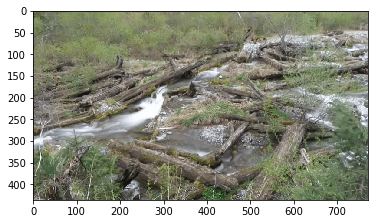

In [3]:
avg = cv2.merge([bAvg, gAvg, rAvg]).astype("uint8")
plt.imshow(cv2.cvtColor(avg, cv2.COLOR_BGR2RGB))

pilimg = PIL.Image.fromarray(cv2.cvtColor(avg, cv2.COLOR_BGR2RGB))
pilimg.save("output/20160502110436.png")

Input                   | Output
:------------------------------:|:---------------------------------:
![](./input/20160502110436.gif) |  ![](./output/20160502110436.png)

# Some tests

In [5]:
%%time

rAvg, gAvg, bAvg = calculateAvg("input/20160502110109.gif")

avg = cv2.merge([bAvg, gAvg, rAvg]).astype("uint8")
pilimg = PIL.Image.fromarray(cv2.cvtColor(avg, cv2.COLOR_BGR2RGB))
pilimg.save("output/20160502110109.png")

CPU times: user 2.22 s, sys: 24 ms, total: 2.24 s
Wall time: 2.54 s


Input                           |  Output
:------------------------------:|:---------------------------------:
![](./input/20160502110109.gif) |  ![](./output/20160502110109.png)

In [6]:
%%time

rAvg, gAvg, bAvg = calculateAvg("input/20160502112315.gif")

avg = cv2.merge([bAvg, gAvg, rAvg]).astype("uint8")
pilimg = PIL.Image.fromarray(cv2.cvtColor(avg, cv2.COLOR_BGR2RGB))
pilimg.save("output/20160502112315.png")

CPU times: user 1.99 s, sys: 28 ms, total: 2.02 s
Wall time: 2.26 s


Input                           |  Output
:------------------------------:|:---------------------------------:
![](./input/20160502112315.gif) |  ![](./output/20160502112315.png)

In [7]:
%%time

rAvg, gAvg, bAvg = calculateAvg("input/20160502163126.gif")

avg = cv2.merge([bAvg, gAvg, rAvg]).astype("uint8")
pilimg = PIL.Image.fromarray(cv2.cvtColor(avg, cv2.COLOR_BGR2RGB))
pilimg.save("output/20160502163126.png")

CPU times: user 2.36 s, sys: 88 ms, total: 2.44 s
Wall time: 3.99 s


Input                           |  Output
:------------------------------:|:---------------------------------:
![](./input/20160502163126.gif) |  ![](./output/20160502163126.png)

In [8]:
%%time

rAvg, gAvg, bAvg = calculateAvg("input/20160502163943.gif")

avg = cv2.merge([bAvg, gAvg, rAvg]).astype("uint8")
pilimg = PIL.Image.fromarray(cv2.cvtColor(avg, cv2.COLOR_BGR2RGB))
pilimg.save("output/20160502163943.png")

CPU times: user 2.22 s, sys: 32 ms, total: 2.25 s
Wall time: 2.82 s


Input                           |  Output
:------------------------------:|:---------------------------------:
![](./input/20160502163943.gif) |  ![](./output/20160502163943.png)

In [9]:
%%time

rAvg, gAvg, bAvg = calculateAvg("input/20160502164659.gif")

avg = cv2.merge([bAvg, gAvg, rAvg]).astype("uint8")
pilimg = PIL.Image.fromarray(cv2.cvtColor(avg, cv2.COLOR_BGR2RGB))
pilimg.save("output/20160502164659.png")

CPU times: user 2.2 s, sys: 60 ms, total: 2.26 s
Wall time: 2.7 s


Input                           |  Output
:------------------------------:|:---------------------------------:
![](./input/20160502164659.gif) |  ![](./output/20160502164659.png)